# Overview Machine Learning

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv(("../data/heart.csv"))
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
303,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
505,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
618,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
765,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
433,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
224,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
503,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
974,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
820,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


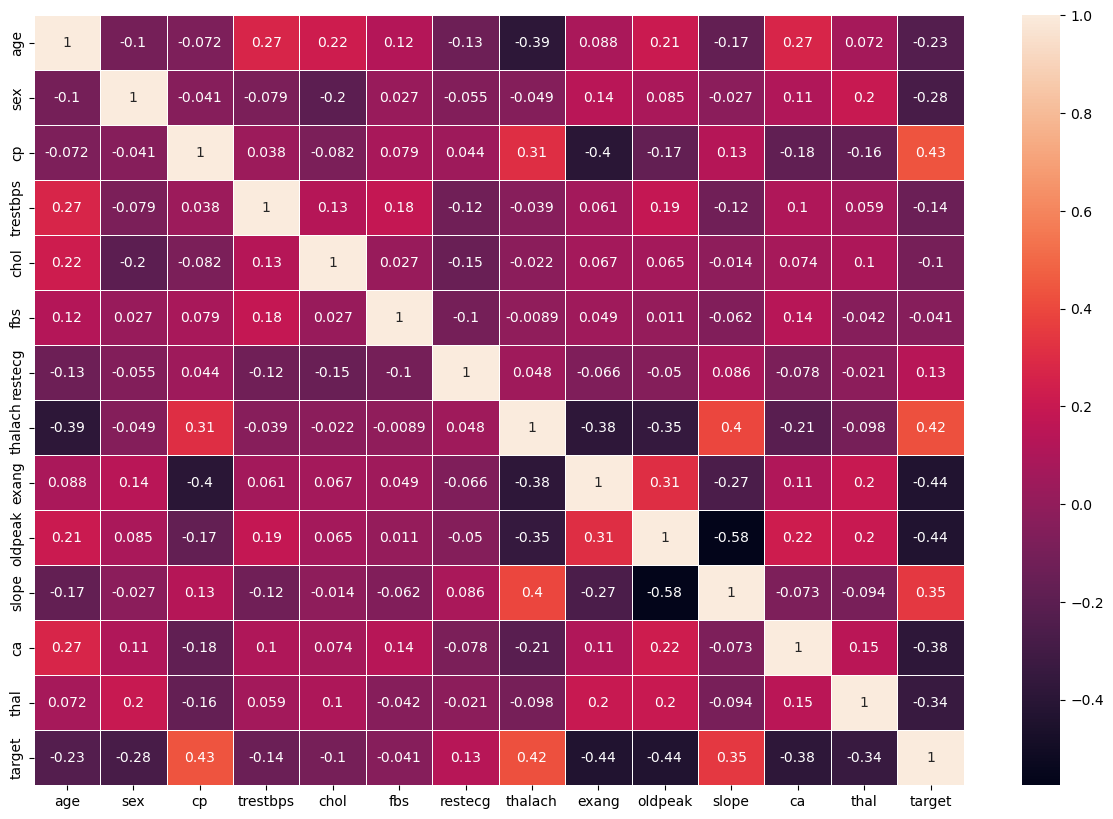

In [70]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5)

In [71]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LogisticRegression(max_iter=1000)

In [73]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## hyperparameter tunning

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [75]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])
grid = GridSearchCV(pipeline, param_grid={'model__C':[0.01,0.1,1,10,100],
                                          'model__solver':['liblinear','lbfgs']},
                    cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

NameError: name 'Y_train' is not defined

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.47916667, 1.        , 0.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.25      , 0.66666667,
        0.        ],
       [0.4375    , 0.        , 0.        , ..., 0.        , 0.66666667,
        1.        ],
       [0.52083333, 1.        , 0.        , ..., 0.25      , 1.        ,
        0.        ]])

In [ ]:
X = df_scaled.drop("target", axis=1)
y = df_scaled["target"]

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])
grid = GridSearchCV(pipeline, param_grid={'model__C':[0.01,0.1,1,10,100],
                                          'model__solver':['liblinear','lbfgs']},
                    cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'model__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
best_model = grid.best_params_

In [76]:
y_pred = best_model.predict(X_test)

AttributeError: 'dict' object has no attribute 'predict'